In [2]:
#Import Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
df = pd.read_csv('Week_2/week_2_final_dataset.csv')

In [2]:
df

,Song,Artist,Popularity,BPM,Time,Dance,Energy,Acoustic,Happy,Live,Loud (Db),Camelot,Artist_Clean,Song_Clean,Genre Tags,lyrics,time_seconds,time_bucket
0,Smalltown Boy,Bronski Beat,3,135,05:03,68,56,53,93,20,-11,6B,Bronski Beat,Smalltown Boy,"80s, new wave, synthpop, pop, synth pop",To your soul\nTo your soul\nCry\nCry\nCry\n\nY...,303,300
1,I'm Still Standing,Elton John,6,177,03:01,49,93,46,79,30,-6,3A,Elton John,I'm Still Standing,"pop, 80s, elton john, rock, classic rock",You could never know what it's like\nYour bloo...,181,180
2,Funky Town,Lipps Inc.,6,122,03:59,91,63,0,34,10,-8,8B,Lipps Inc.,Funky Town,"Disco, 80s, pop, 70s, dance",Gotta make a move to a town that's right for m...,239,230
3,I'm So Excited,The Pointer Sisters,65,92,03:49,69,86,10,69,10,-6,4B,The Pointer Sisters,I'm So Excited,"80s, Disco, pop, dance, soul",Tonight's the night we're gonna make it happen...,229,220
4,Cheri Cheri Lady,Modern Talking,82,114,03:46,68,62,46,85,30,-14,6B,Modern Talking,Cheri Cheri Lady,"80s, Disco, pop, Modern Talking, dance","Oh, I cannot explain\nEvery time, it's the sam...",226,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,Rock with You - Single Version,Michael Jackson,82,114,03:40,81,54,18,85,10,-13,3B,Michael Jackson,Rock with You,"pop, michael jackson, 80s, Disco, dance","Girl, close your eyes\nLet that rhythm get int...",220,220
4091,You Sexy Thing,Hot Chocolate,75,106,04:04,79,73,52,96,10,-5,7B,Hot Chocolate,You Sexy Thing,"Disco, 70s, funk, soul, pop",I believe in miracles\nWhere're you from?\nYou...,244,240
4092,Get It On,T. Rex,72,127,04:22,73,88,18,91,60,-7,10A,T. Rex,Get It On,"glam rock, 70s, classic rock, rock, glam","Well, you're dirty and sweet\nClad in black, d...",262,260
4093,Love Really Hurts Without You,Billy Ocean,1,141,02:58,52,91,0,96,10,-4,7B,Billy Ocean,Love Really Hurts Without You,"80s, pop, soul, 70s, Disco",You run around town like a fool and you think ...,178,170


Removing redundant columns

In [3]:
df = df.drop(columns=['Time', 'time_bucket', 'Artist_Clean', 'Song_Clean'])

In [4]:
df_filtered = df[df['Popularity'] >= 20].reset_index(drop=True)

In [5]:
genre_split = df_filtered['Genre Tags'].str.split(',', expand=True)

genre_split = genre_split.apply(lambda col: col.str.strip())

def clean_genre(genre):
    if pd.isna(genre):
        return None
    genre = genre.strip().lower()              # trim and lowercase
    genre = genre.replace('&', 'and')          # normalize symbols
    genre = genre.replace('-', ' ')            # normalize hyphens
    genre = genre.replace('/', ' ')            # normalize slashes
    genre = genre.replace('  ', ' ')           # remove double spaces
    return genre

# Apply cleaning to each genre column
genre_split_cleaned = genre_split.applymap(clean_genre)

genre_split_cleaned.columns = ['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5']
df_filtered = pd.concat([df_filtered, genre_split_cleaned], axis=1)

/var/folders/nf/jqpg66kx52z7vrjhxgwb3h480000gn/T/ipykernel_93169/1685496884.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  genre_split_cleaned = genre_split.applymap(clean_genre)


In [6]:
df_filtered

,Song,Artist,Popularity,BPM,Dance,Energy,Acoustic,Happy,Live,Loud (Db),Camelot,Genre Tags,lyrics,time_seconds,Genre1,Genre2,Genre3,Genre4,Genre5
0,I'm So Excited,The Pointer Sisters,65,92,69,86,10,69,10,-6,4B,"80s, Disco, pop, dance, soul",Tonight's the night we're gonna make it happen...,229,80s,disco,pop,dance,soul
1,Cheri Cheri Lady,Modern Talking,82,114,68,62,46,85,30,-14,6B,"80s, Disco, pop, Modern Talking, dance","Oh, I cannot explain\nEvery time, it's the sam...",226,80s,disco,pop,modern talking,dance
2,Give It Up,KC & The Sunshine Band,58,126,84,65,8,84,0,-12,5B,"Disco, 70s, 80s, pop, funk",Everybody wants you\nEverybody wants your love...,245,disco,70s,80s,pop,funk
3,It's Raining Men - Single Version,The Weather Girls,50,136,66,93,46,46,70,-6,4A,"Disco, 80s, pop, dance, female vocalists",Hi! Hi! We're your weather girls\n(Uh huh)\nAn...,211,disco,80s,pop,dance,female vocalists
4,Take on Me,a-ha,89,84,57,90,2,88,0,-8,11A,"80s, pop, new wave, synthpop, synth pop","We're talking away\nNo, I don't know what I'm ...",225,80s,pop,new wave,synthpop,synth pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,Play That Funky Music,Wild Cherry,76,109,81,67,4,93,0,-12,11B,"funk, Disco, 70s, funky, soul","A-hey, do it now, huh\nYeah, hey\n\nHey-ah, on...",300,funk,disco,70s,funky,soul
3422,Rock with You - Single Version,Michael Jackson,82,114,81,54,18,85,10,-13,3B,"pop, michael jackson, 80s, Disco, dance","Girl, close your eyes\nLet that rhythm get int...",220,pop,michael jackson,80s,disco,dance
3423,You Sexy Thing,Hot Chocolate,75,106,79,73,52,96,10,-5,7B,"Disco, 70s, funk, soul, pop",I believe in miracles\nWhere're you from?\nYou...,244,disco,70s,funk,soul,pop
3424,Get It On,T. Rex,72,127,73,88,18,91,60,-7,10A,"glam rock, 70s, classic rock, rock, glam","Well, you're dirty and sweet\nClad in black, d...",262,glam rock,70s,classic rock,rock,glam


In [7]:
# Combine all genre columns into one Series
all_genres = genre_split_cleaned.stack().reset_index(drop=True)

# Count genre frequency
genre_counts = all_genres.value_counts()

In [8]:
popular_genres = genre_counts[genre_counts > 100]

# Print them
print(popular_genres)

rock                 1019
pop                   950
hip hop               499
indie                 475
alternative           464
classic rock          434
80s                   417
female vocalists      382
70s                   310
singer songwriter     280
rap                   278
dance                 275
rnb                   261
indie rock            250
electronic            246
soul                  242
indie pop             215
country               202
folk                  193
alternative rock      183
myspotigrambot        167
90s                   141
oldies                130
british               128
new wave              126
60s                   119
disco                 113
synthpop              112
love                  105
trap                  101
Name: count, dtype: int64


In [9]:
def top_cooccurring_genres(genre_input):
    genre_cols = ['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5']
    
    # Step 1: Filter rows where the input genre appears
    is_genre = df_filtered[genre_cols].isin([genre_input]).any(axis=1)
    genre_rows = df_filtered[is_genre]
    
    # Step 2: Stack genre columns and exclude the input genre
    stacked_genres = genre_rows[genre_cols].stack()
    other_genres = stacked_genres[stacked_genres != genre_input]
    
    # Step 3: Count each co-occurring genre by unique song
    # We'll count how many *songs* (rows) include each genre alongside the input
    cooccurrence_counts = {}
    for genre in other_genres.unique():
        count = genre_rows[genre_cols].isin([genre]).any(axis=1).sum()
        cooccurrence_counts[genre] = count

    # Step 4: Convert to percentages of total input-genre songs
    total_input_songs = genre_rows.shape[0]
    genre_percentages = {k: round(v / total_input_songs * 100, 2) for k, v in cooccurrence_counts.items()}

    # Step 5: Convert to Series and return top 10
    return pd.Series(genre_percentages).sort_values(ascending=False).head(10)



In [10]:
def top_cooccurrences_list(genre_list, top_n=5):
    result = {}
    for genre in genre_list:
        try:
            top_cooccurring = top_cooccurring_genres(genre)
            result[genre] = top_cooccurring.head(top_n)
        except Exception as e:
            print(f"Error processing '{genre}': {e}")
            result[genre] = None
    return result


In [11]:
common_list = ['rock', 'pop', 'hip hop', 'indie', 'alternative', 'rap', 'dance', 'rnb', 'electronic', 'soul', 'country', 'folk']
maybe_list = ['oldies', 'new wave', 'disco', 'synthpop', 'classic rock']
eras_list = ['60s', '70s', '80s', '90s']
others_list = ['female vocalists', 'singer songwriter', 'myspotigrambot', 'british', 'love', 'trap']

In [12]:
top_cooccurrences = top_cooccurrences_list(common_list)

# Display results
for genre, cooccurrences in top_cooccurrences.items():
    print(f"\nTop co-occurring genres for '{genre}':")
    if cooccurrences is not None:
        print(cooccurrences)
    else:
        print("No data or error.")



Top co-occurring genres for 'rock':
classic rock    38.76
alternative     28.75
pop             24.63
80s             19.92
70s             15.90
dtype: float64

Top co-occurring genres for 'pop':
80s                 28.00
rock                26.42
female vocalists    19.37
dance               18.53
70s                 10.95
dtype: float64

Top co-occurring genres for 'hip hop':
rap               66.96
myspotigrambot    19.13
rnb               18.55
trap              15.65
drake              8.99
dtype: float64

Top co-occurring genres for 'indie':
alternative    35.58
indie rock     35.37
rock           32.42
indie pop      24.84
pop            16.63
dtype: float64

Top co-occurring genres for 'alternative':
rock                63.15
indie               36.42
alternative rock    29.96
indie rock          18.53
pop                 16.81
dtype: float64

Top co-occurring genres for 'rap':
hip hop           83.09
myspotigrambot    21.22
trap              16.19
rnb               11.87
pop

In [13]:
maybe_cooccurrences = top_cooccurrences_list(maybe_list)

# Display results
for genre, cooccurrences in maybe_cooccurrences.items():
    print(f"\nTop co-occurring genres for '{genre}':")
    if cooccurrences is not None:
        print(cooccurrences)
    else:
        print("No data or error.")


Top co-occurring genres for 'oldies':
70s             43.85
60s             41.54
pop             39.23
classic rock    38.46
rock            32.31
dtype: float64

Top co-occurring genres for 'new wave':
80s            85.71
pop            67.46
rock           49.21
synthpop       24.60
alternative    13.49
dtype: float64

Top co-occurring genres for 'disco':
pop      69.03
80s      42.48
dance    41.59
70s      38.94
soul     32.74
dtype: float64

Top co-occurring genres for 'synthpop':
pop           63.39
new wave      27.68
electronic    25.89
electropop    21.43
80s           18.75
dtype: float64

Top co-occurring genres for 'classic rock':
rock    91.22
70s     38.34
80s     29.56
pop     23.09
60s     17.78
dtype: float64


In [14]:
eras_cooccurrences = top_cooccurrences_list(eras_list)

# Display results
for genre, cooccurrences in eras_cooccurrences.items():
    print(f"\nTop co-occurring genres for '{genre}':")
    if cooccurrences is not None:
        print(cooccurrences)
    else:
        print("No data or error.")


Top co-occurring genres for '60s':
classic rock    64.71
rock            58.82
oldies          45.38
pop             26.05
soul            17.65
dtype: float64

Top co-occurring genres for '70s':
classic rock    53.55
rock            52.26
pop             33.55
oldies          18.39
soul            18.06
dtype: float64

Top co-occurring genres for '80s':
pop                 63.79
rock                48.68
classic rock        30.70
new wave            25.90
female vocalists    19.66
dtype: float64

Top co-occurring genres for '90s':
rock                51.77
pop                 41.13
alternative         37.59
female vocalists    26.95
alternative rock    20.57
dtype: float64


In [15]:
others_cooccurrences = top_cooccurrences_list(others_list)

# Display results
for genre, cooccurrences in others_cooccurrences.items():
    print(f"\nTop co-occurring genres for '{genre}':")
    if cooccurrences is not None:
        print(cooccurrences)
    else:
        print("No data or error.")


Top co-occurring genres for 'female vocalists':
pop                  48.17
rock                 22.77
80s                  21.47
singer songwriter    19.37
alternative          19.11
dtype: float64

Top co-occurring genres for 'singer songwriter':
folk                39.64
rock                31.43
female vocalists    26.43
classic rock        22.50
indie               19.29
dtype: float64

Top co-occurring genres for 'myspotigrambot':
hip hop    39.52
rap        35.33
trap       25.75
rnb        16.17
pop rap    11.38
dtype: float64

Top co-occurring genres for 'british':
rock           50.78
pop            38.28
indie          25.78
alternative    22.66
80s            17.19
dtype: float64

Top co-occurring genres for 'love':
pop                 37.14
female vocalists    19.05
rock                17.14
indie               13.33
rnb                 10.48
dtype: float64

Top co-occurring genres for 'trap':
hip hop           53.47
rap               44.55
myspotigrambot    42.57
pop rap 

In [16]:
genre_cols = ['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5']

replacements = {
    'rap': 'hip hop',
    'new wave': '80s',
    'classic rock': 'rock'
}

# Replace values in all genre columns
df_filtered[genre_cols] = df_filtered[genre_cols].applymap(lambda x: replacements.get(x, x))

/var/folders/nf/jqpg66kx52z7vrjhxgwb3h480000gn/T/ipykernel_93169/935651091.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_filtered[genre_cols] = df_filtered[genre_cols].applymap(lambda x: replacements.get(x, x))


In [17]:
df_filtered

,Song,Artist,Popularity,BPM,Dance,Energy,Acoustic,Happy,Live,Loud (Db),Camelot,Genre Tags,lyrics,time_seconds,Genre1,Genre2,Genre3,Genre4,Genre5
0,I'm So Excited,The Pointer Sisters,65,92,69,86,10,69,10,-6,4B,"80s, Disco, pop, dance, soul",Tonight's the night we're gonna make it happen...,229,80s,disco,pop,dance,soul
1,Cheri Cheri Lady,Modern Talking,82,114,68,62,46,85,30,-14,6B,"80s, Disco, pop, Modern Talking, dance","Oh, I cannot explain\nEvery time, it's the sam...",226,80s,disco,pop,modern talking,dance
2,Give It Up,KC & The Sunshine Band,58,126,84,65,8,84,0,-12,5B,"Disco, 70s, 80s, pop, funk",Everybody wants you\nEverybody wants your love...,245,disco,70s,80s,pop,funk
3,It's Raining Men - Single Version,The Weather Girls,50,136,66,93,46,46,70,-6,4A,"Disco, 80s, pop, dance, female vocalists",Hi! Hi! We're your weather girls\n(Uh huh)\nAn...,211,disco,80s,pop,dance,female vocalists
4,Take on Me,a-ha,89,84,57,90,2,88,0,-8,11A,"80s, pop, new wave, synthpop, synth pop","We're talking away\nNo, I don't know what I'm ...",225,80s,pop,80s,synthpop,synth pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,Play That Funky Music,Wild Cherry,76,109,81,67,4,93,0,-12,11B,"funk, Disco, 70s, funky, soul","A-hey, do it now, huh\nYeah, hey\n\nHey-ah, on...",300,funk,disco,70s,funky,soul
3422,Rock with You - Single Version,Michael Jackson,82,114,81,54,18,85,10,-13,3B,"pop, michael jackson, 80s, Disco, dance","Girl, close your eyes\nLet that rhythm get int...",220,pop,michael jackson,80s,disco,dance
3423,You Sexy Thing,Hot Chocolate,75,106,79,73,52,96,10,-5,7B,"Disco, 70s, funk, soul, pop",I believe in miracles\nWhere're you from?\nYou...,244,disco,70s,funk,soul,pop
3424,Get It On,T. Rex,72,127,73,88,18,91,60,-7,10A,"glam rock, 70s, classic rock, rock, glam","Well, you're dirty and sweet\nClad in black, d...",262,glam rock,70s,rock,rock,glam


In [18]:
major_genres = {
    'rock', 'pop', 'hip hop', 'indie', 'alternative',
    'dance', 'rnb', 'electronic', 'soul', 'country', 'folk'
}

secondary_genres = major_genres.union({
    '60s', '70s', '80s', '90s', 'disco', 'synthpop'
})

genre_cols = ['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5']

In [19]:
major_genres = {
    'rock', 'pop', 'hip hop', 'indie', 'alternative',
    'dance', 'rnb', 'electronic', 'soul', 'country', 'folk'
}

secondary_genres = major_genres.union({
    '60s', '70s', '80s', '90s', 'disco', 'synthpop'
})

genre_cols = ['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5']

def assign_primary_secondary(row):
    genres = [row[col] for col in genre_cols if pd.notna(row[col])]

    # Step 1: Check for compound genres
    for g in genres:
        if not isinstance(g, str):
            continue
        parts = g.strip().lower().split()
        if len(parts) == 2:
            part1, part2 = parts[0], parts[1]
            if ((part1 in major_genres and part2 in secondary_genres) or
                (part2 in major_genres and part1 in secondary_genres) or
                (part1 in major_genres and part2 in major_genres)):
                return pd.Series([part1, part2])

    # Step 2a: Find primary = first major genre
    primary = next((g for g in genres if g in major_genres), None)

    # Step 2b: Find secondary = first secondary ≠ primary
    if primary:
        secondary = next((g for g in genres if g in secondary_genres and g != primary), None)
    else:
        secondary = None

    return pd.Series([primary, secondary])



In [20]:
# Apply to DataFrame
df_filtered[['primary_genre', 'secondary_genre']] = df_filtered.apply(assign_primary_secondary, axis=1)

In [21]:
df_filtered['primary_genre'].isna().sum()

np.int64(401)

In [22]:
df_filtered

,Song,Artist,Popularity,BPM,Dance,Energy,Acoustic,Happy,Live,Loud (Db),...,Genre Tags,lyrics,time_seconds,Genre1,Genre2,Genre3,Genre4,Genre5,primary_genre,secondary_genre
0,I'm So Excited,The Pointer Sisters,65,92,69,86,10,69,10,-6,...,"80s, Disco, pop, dance, soul",Tonight's the night we're gonna make it happen...,229,80s,disco,pop,dance,soul,pop,80s
1,Cheri Cheri Lady,Modern Talking,82,114,68,62,46,85,30,-14,...,"80s, Disco, pop, Modern Talking, dance","Oh, I cannot explain\nEvery time, it's the sam...",226,80s,disco,pop,modern talking,dance,pop,80s
2,Give It Up,KC & The Sunshine Band,58,126,84,65,8,84,0,-12,...,"Disco, 70s, 80s, pop, funk",Everybody wants you\nEverybody wants your love...,245,disco,70s,80s,pop,funk,pop,disco
3,It's Raining Men - Single Version,The Weather Girls,50,136,66,93,46,46,70,-6,...,"Disco, 80s, pop, dance, female vocalists",Hi! Hi! We're your weather girls\n(Uh huh)\nAn...,211,disco,80s,pop,dance,female vocalists,pop,disco
4,Take on Me,a-ha,89,84,57,90,2,88,0,-8,...,"80s, pop, new wave, synthpop, synth pop","We're talking away\nNo, I don't know what I'm ...",225,80s,pop,80s,synthpop,synth pop,pop,80s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,Play That Funky Music,Wild Cherry,76,109,81,67,4,93,0,-12,...,"funk, Disco, 70s, funky, soul","A-hey, do it now, huh\nYeah, hey\n\nHey-ah, on...",300,funk,disco,70s,funky,soul,soul,disco
3422,Rock with You - Single Version,Michael Jackson,82,114,81,54,18,85,10,-13,...,"pop, michael jackson, 80s, Disco, dance","Girl, close your eyes\nLet that rhythm get int...",220,pop,michael jackson,80s,disco,dance,pop,80s
3423,You Sexy Thing,Hot Chocolate,75,106,79,73,52,96,10,-5,...,"Disco, 70s, funk, soul, pop",I believe in miracles\nWhere're you from?\nYou...,244,disco,70s,funk,soul,pop,soul,disco
3424,Get It On,T. Rex,72,127,73,88,18,91,60,-7,...,"glam rock, 70s, classic rock, rock, glam","Well, you're dirty and sweet\nClad in black, d...",262,glam rock,70s,rock,rock,glam,rock,70s


In [23]:
df_filtered = df_filtered.dropna(subset=['primary_genre'])

In [24]:
df_filtered.reset_index(drop=True)

,Song,Artist,Popularity,BPM,Dance,Energy,Acoustic,Happy,Live,Loud (Db),...,Genre Tags,lyrics,time_seconds,Genre1,Genre2,Genre3,Genre4,Genre5,primary_genre,secondary_genre
0,I'm So Excited,The Pointer Sisters,65,92,69,86,10,69,10,-6,...,"80s, Disco, pop, dance, soul",Tonight's the night we're gonna make it happen...,229,80s,disco,pop,dance,soul,pop,80s
1,Cheri Cheri Lady,Modern Talking,82,114,68,62,46,85,30,-14,...,"80s, Disco, pop, Modern Talking, dance","Oh, I cannot explain\nEvery time, it's the sam...",226,80s,disco,pop,modern talking,dance,pop,80s
2,Give It Up,KC & The Sunshine Band,58,126,84,65,8,84,0,-12,...,"Disco, 70s, 80s, pop, funk",Everybody wants you\nEverybody wants your love...,245,disco,70s,80s,pop,funk,pop,disco
3,It's Raining Men - Single Version,The Weather Girls,50,136,66,93,46,46,70,-6,...,"Disco, 80s, pop, dance, female vocalists",Hi! Hi! We're your weather girls\n(Uh huh)\nAn...,211,disco,80s,pop,dance,female vocalists,pop,disco
4,Take on Me,a-ha,89,84,57,90,2,88,0,-8,...,"80s, pop, new wave, synthpop, synth pop","We're talking away\nNo, I don't know what I'm ...",225,80s,pop,80s,synthpop,synth pop,pop,80s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,Play That Funky Music,Wild Cherry,76,109,81,67,4,93,0,-12,...,"funk, Disco, 70s, funky, soul","A-hey, do it now, huh\nYeah, hey\n\nHey-ah, on...",300,funk,disco,70s,funky,soul,soul,disco
3021,Rock with You - Single Version,Michael Jackson,82,114,81,54,18,85,10,-13,...,"pop, michael jackson, 80s, Disco, dance","Girl, close your eyes\nLet that rhythm get int...",220,pop,michael jackson,80s,disco,dance,pop,80s
3022,You Sexy Thing,Hot Chocolate,75,106,79,73,52,96,10,-5,...,"Disco, 70s, funk, soul, pop",I believe in miracles\nWhere're you from?\nYou...,244,disco,70s,funk,soul,pop,soul,disco
3023,Get It On,T. Rex,72,127,73,88,18,91,60,-7,...,"glam rock, 70s, classic rock, rock, glam","Well, you're dirty and sweet\nClad in black, d...",262,glam rock,70s,rock,rock,glam,rock,70s


In [25]:
df_filtered = df_filtered.drop(columns=['Genre Tags', 'Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5'])

In [26]:
df_filtered

,Song,Artist,Popularity,BPM,Dance,Energy,Acoustic,Happy,Live,Loud (Db),Camelot,lyrics,time_seconds,primary_genre,secondary_genre
0,I'm So Excited,The Pointer Sisters,65,92,69,86,10,69,10,-6,4B,Tonight's the night we're gonna make it happen...,229,pop,80s
1,Cheri Cheri Lady,Modern Talking,82,114,68,62,46,85,30,-14,6B,"Oh, I cannot explain\nEvery time, it's the sam...",226,pop,80s
2,Give It Up,KC & The Sunshine Band,58,126,84,65,8,84,0,-12,5B,Everybody wants you\nEverybody wants your love...,245,pop,disco
3,It's Raining Men - Single Version,The Weather Girls,50,136,66,93,46,46,70,-6,4A,Hi! Hi! We're your weather girls\n(Uh huh)\nAn...,211,pop,disco
4,Take on Me,a-ha,89,84,57,90,2,88,0,-8,11A,"We're talking away\nNo, I don't know what I'm ...",225,pop,80s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,Play That Funky Music,Wild Cherry,76,109,81,67,4,93,0,-12,11B,"A-hey, do it now, huh\nYeah, hey\n\nHey-ah, on...",300,soul,disco
3422,Rock with You - Single Version,Michael Jackson,82,114,81,54,18,85,10,-13,3B,"Girl, close your eyes\nLet that rhythm get int...",220,pop,80s
3423,You Sexy Thing,Hot Chocolate,75,106,79,73,52,96,10,-5,7B,I believe in miracles\nWhere're you from?\nYou...,244,soul,disco
3424,Get It On,T. Rex,72,127,73,88,18,91,60,-7,10A,"Well, you're dirty and sweet\nClad in black, d...",262,rock,70s


In [27]:
df_filtered['primary_genre'].value_counts()

primary_genre
pop            546
rock           539
indie          539
hip hop        327
alternative    273
country        193
soul           152
electronic     143
folk           112
dance          111
rnb             86
90s              2
80s              1
disco            1
Name: count, dtype: int64

In [28]:
df_filtered['secondary_genre'].value_counts()

secondary_genre
rock           507
pop            401
80s            366
70s            240
rnb            139
60s            103
alternative     91
90s             89
dance           84
folk            64
disco           48
electronic      47
indie           46
synthpop        40
soul            36
hip hop         24
country          8
Name: count, dtype: int64

In [29]:
# Combine primary and secondary genre into a single string (e.g., "pop rock")
df_filtered['genre_pair'] = df_filtered.apply(
    lambda row: f"{row['primary_genre']} {row['secondary_genre']}" 
    if pd.notna(row['primary_genre']) and pd.notna(row['secondary_genre']) 
    else (row['primary_genre'] if pd.notna(row['primary_genre']) else None),
    axis=1
)

# Count the combinations and sort by frequency
genre_pair_counts = df_filtered['genre_pair'].value_counts().reset_index()
genre_pair_counts.columns = ['genre_pair', 'count']

# Display the result
print(genre_pair_counts)

             genre_pair  count
0               hip hop    233
1            indie rock    207
2             indie pop    203
3               pop 80s    168
4      alternative rock    163
..                  ...    ...
131           rnb dance      1
132  electronic hip hop      1
133     rock electronic      1
134           indie rnb      1
135           disco pop      1

[136 rows x 2 columns]


In [30]:
rare_genres = genre_pair_counts[genre_pair_counts['count'] < 5]

print(rare_genres)

                 genre_pair  count
77              pop country      4
78      hip hop alternative      4
79             hip hop soul      4
80   alternative electronic      4
81         electronic disco      3
82        alternative dance      3
83              country 80s      3
84              hip hop 80s      3
85             hip hop rock      3
86         soul alternative      3
87           electronic rnb      3
88             rnb synthpop      3
89            dance hip hop      3
90         alternative folk      3
91                dance 90s      3
92                  rnb 90s      3
93          alternative 90s      3
94             country soul      2
95             folk country      2
96          country hip hop      2
97          soul electronic      2
98          electronic rock      2
99                rock soul      2
100             indie disco      2
101                 rnb 80s      2
102           hip hop indie      2
103        folk alternative      1
104          rnb ele

In [31]:
pair_counts = df_filtered['genre_pair'].value_counts()

# Step 3: Filter to keep only genre pairs with count >= 5
valid_pairs = pair_counts[pair_counts >= 5].index

# Step 4: Keep only rows with genre_pair in valid_pairs
df_filtered = df_filtered[df_filtered['genre_pair'].isin(valid_pairs)].copy()

df_filtered = df_filtered.reset_index(drop=True)

In [32]:
df_filtered = df_filtered.drop(columns=['secondary_genre'])

In [33]:
df_filtered = df_filtered.rename(columns={
    'Loud (Db)': 'Loud',
    'lyrics': 'Lyrics',
    'time_seconds': 'Time',
    'primary_genre': 'Genre',
    'genre_pair': 'Subgenre'
})

In [34]:
df_filtered

,Song,Artist,Popularity,BPM,Dance,Energy,Acoustic,Happy,Live,Loud,Camelot,Lyrics,Time,Genre,Subgenre
0,I'm So Excited,The Pointer Sisters,65,92,69,86,10,69,10,-6,4B,Tonight's the night we're gonna make it happen...,229,pop,pop 80s
1,Cheri Cheri Lady,Modern Talking,82,114,68,62,46,85,30,-14,6B,"Oh, I cannot explain\nEvery time, it's the sam...",226,pop,pop 80s
2,Give It Up,KC & The Sunshine Band,58,126,84,65,8,84,0,-12,5B,Everybody wants you\nEverybody wants your love...,245,pop,pop disco
3,It's Raining Men - Single Version,The Weather Girls,50,136,66,93,46,46,70,-6,4A,Hi! Hi! We're your weather girls\n(Uh huh)\nAn...,211,pop,pop disco
4,Take on Me,a-ha,89,84,57,90,2,88,0,-8,11A,"We're talking away\nNo, I don't know what I'm ...",225,pop,pop 80s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,Play That Funky Music,Wild Cherry,76,109,81,67,4,93,0,-12,11B,"A-hey, do it now, huh\nYeah, hey\n\nHey-ah, on...",300,soul,soul disco
2915,Rock with You - Single Version,Michael Jackson,82,114,81,54,18,85,10,-13,3B,"Girl, close your eyes\nLet that rhythm get int...",220,pop,pop 80s
2916,You Sexy Thing,Hot Chocolate,75,106,79,73,52,96,10,-5,7B,I believe in miracles\nWhere're you from?\nYou...,244,soul,soul disco
2917,Get It On,T. Rex,72,127,73,88,18,91,60,-7,10A,"Well, you're dirty and sweet\nClad in black, d...",262,rock,rock 70s


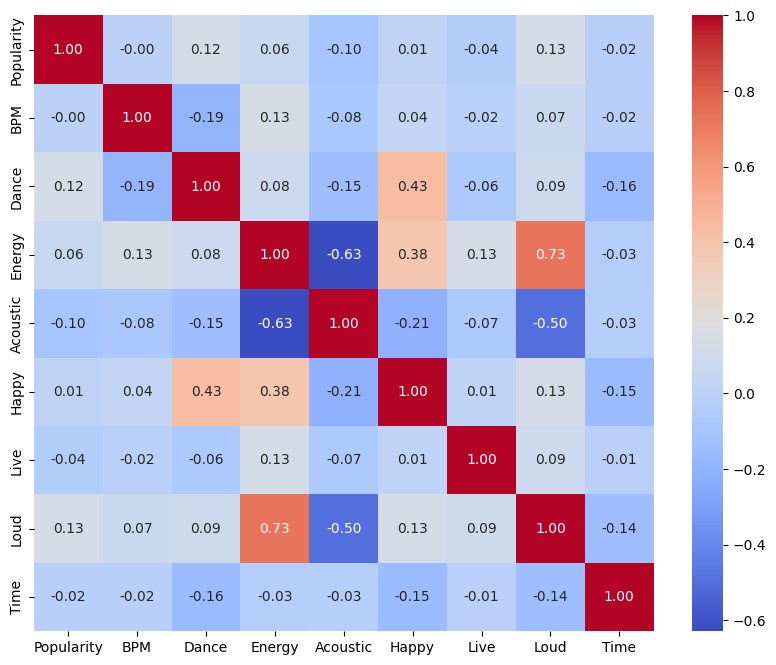

In [35]:

df_numeric = df_filtered.drop(columns=['Song', 'Artist', 'Camelot', 'Lyrics', 'Genre', 'Subgenre'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [36]:
df_filtered.to_csv('Week_3/week_3_final_dataset.csv', index=False)

In [6]:
df_clean = pd.read_csv('Week_3/week_3_final_dataset.csv')

In [7]:
#show the top 5 rows of the cleaned dataframe
df_clean.head()

,Song,Artist,Popularity,BPM,Dance,Energy,Acoustic,Happy,Live,Loud,Camelot,Lyrics,Time,Genre,Subgenre
0,I'm So Excited,The Pointer Sisters,65,92,69,86,10,69,10,-6,4B,Tonight's the night we're gonna make it happen...,229,pop,pop 80s
1,Cheri Cheri Lady,Modern Talking,82,114,68,62,46,85,30,-14,6B,"Oh, I cannot explain\nEvery time, it's the sam...",226,pop,pop 80s
2,Give It Up,KC & The Sunshine Band,58,126,84,65,8,84,0,-12,5B,Everybody wants you\nEverybody wants your love...,245,pop,pop disco
3,It's Raining Men - Single Version,The Weather Girls,50,136,66,93,46,46,70,-6,4A,Hi! Hi! We're your weather girls\n(Uh huh)\nAn...,211,pop,pop disco
4,Take on Me,a-ha,89,84,57,90,2,88,0,-8,11A,"We're talking away\nNo, I don't know what I'm ...",225,pop,pop 80s


In [9]:
#Use the count methods to get the number of observations for each genre within the dataset.
genre_counts = df_clean['Genre'].value_counts()

# Display counts and percentages
#Create a header for reabability
print("Genre Distribution:")
print("==================")

#Create a for loop that calculates the percentge of each genre in the dataset.
#Prints the genre, genre count, and the calculated percentage. 
for genre, count in genre_counts.items():
    percentage = (count/len(df_clean)) * 100
    print(f"{genre}: {count} songs ({percentage:.1f}%)")

Genre Distribution:
pop: 542 songs (18.6%)
rock: 534 songs (18.3%)
indie: 531 songs (18.2%)
hip hop: 310 songs (10.6%)
alternative: 258 songs (8.8%)
country: 182 songs (6.2%)
soul: 144 songs (4.9%)
electronic: 133 songs (4.6%)
folk: 107 songs (3.7%)
dance: 105 songs (3.6%)
rnb: 73 songs (2.5%)


As we can see, the most frequent genres are pop, rock, and indie at about 18%. The least common genre is rnb at 2.5%.

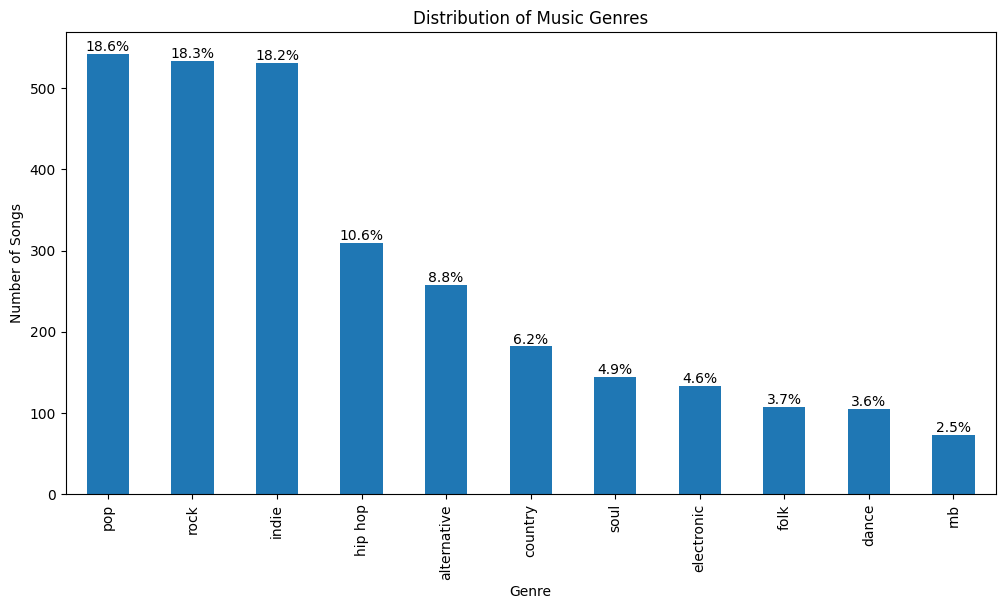

In [13]:
#Create a bar plot to display the genre count data (including percentages)

#Resize the figure to a wider and slightly taller chart to fit all the data
plt.figure(figsize=(12, 6))
#Initiate a bar plot (pandas)
ax = genre_counts.plot(kind='bar')

# Add percentage labels on top of each bar
total = len(df_clean)
for i, v in enumerate(genre_counts):
    percentage = (v/total) * 100        #calculating the percentage with the genre count / total observations
    ax.text(i, v, f'{percentage:.1f}%', 
            ha='center', va='bottom')   #placing the text in the center-bottom of each bar
    
plt.title('Distribution of Music Genres')    #Chart Label
plt.xlabel('Genre')                          #X-axis label
plt.ylabel('Number of Songs')                #Y-axis label
plt.show()

We will repeat the same process for subgenres. 

In [16]:
#Get subgenre counts
subgenre_counts = df_clean['Subgenre'].value_counts()


# Display counts and percentages
#Create a header for reabability
print("Subgenre Distribution:")
print("==================")

#Create a for loop that calculates the percentge of each genre in the dataset.
#Prints the genre, genre count, and the calculated percentage. 
for subgenre, count in subgenre_counts.items():
    percentage = (count/len(df_clean)) * 100
    print(f"{subgenre}: {count} songs ({percentage:.1f}%)")

Subgenre Distribution:
hip hop: 233 songs (8.0%)
indie rock: 207 songs (7.1%)
indie pop: 203 songs (7.0%)
pop 80s: 168 songs (5.8%)
alternative rock: 163 songs (5.6%)
rock 70s: 148 songs (5.1%)
rock 80s: 144 songs (4.9%)
rock: 95 songs (3.3%)
country: 94 songs (3.2%)
pop rock: 75 songs (2.6%)
pop: 68 songs (2.3%)
country pop: 63 songs (2.2%)
rock 60s: 54 songs (1.8%)
alternative rnb: 51 songs (1.7%)
indie folk: 48 songs (1.6%)
dance pop: 46 songs (1.6%)
pop dance: 46 songs (1.6%)
pop 70s: 46 songs (1.6%)
folk rock: 45 songs (1.5%)
rock alternative: 43 songs (1.5%)
indie: 40 songs (1.4%)
rnb: 39 songs (1.3%)
hip hop rnb: 36 songs (1.2%)
soul 70s: 35 songs (1.2%)
electronic: 34 songs (1.2%)
rock 90s: 31 songs (1.1%)
soul: 31 songs (1.1%)
electronic pop: 28 songs (1.0%)
pop 90s: 27 songs (0.9%)
electronic dance: 27 songs (0.9%)
soul rnb: 23 songs (0.8%)
pop 60s: 22 songs (0.8%)
folk: 21 songs (0.7%)
pop synthpop: 19 songs (0.7%)
hip hop 90s: 19 songs (0.7%)
indie alternative: 19 songs (0.

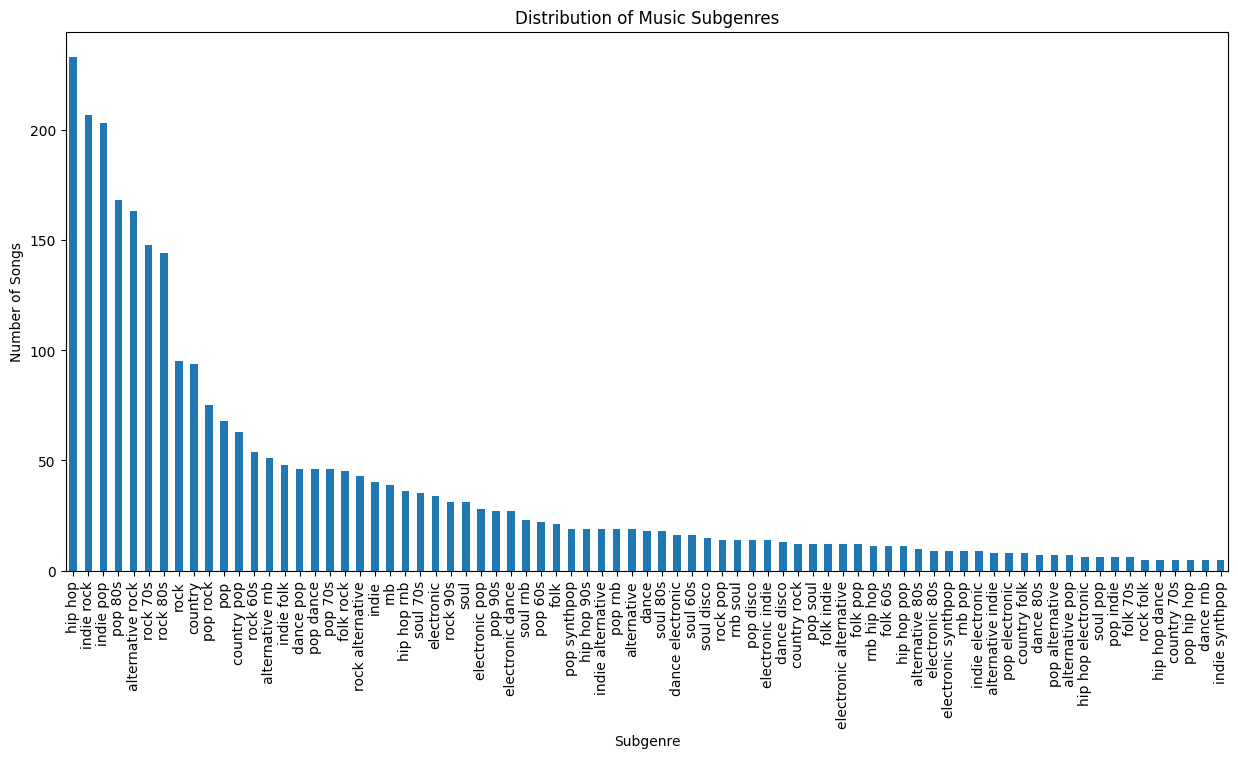

In [18]:
#Bar chart showing the distribution of subgenres.

plt.figure(figsize=(15, 7))  #widening the chart due to larger number of subgenres than genres
ax = subgenre_counts.plot(kind='bar')   #Initialize bar chart

#Chart aesthetics
plt.title('Distribution of Music Subgenres')
plt.xlabel('Subgenre')
plt.ylabel('Number of Songs')
plt.show()

As we can see, the distribution of subgenres is much more complex than genres due to the larger number of subgenres. There are about 7u subgenres that are much more common than the others (hip hop, indie rock, indie pop, pop 80s, alternative rock, rock 70s, rock 80s). 

To better understand certain genres have a higher change of containing certain subgenres the next step taken was to create a horizaontal bar chart showing the distribution of each subgenre within each genre. This will give us a better understanding of relationships between genre and subgenre.

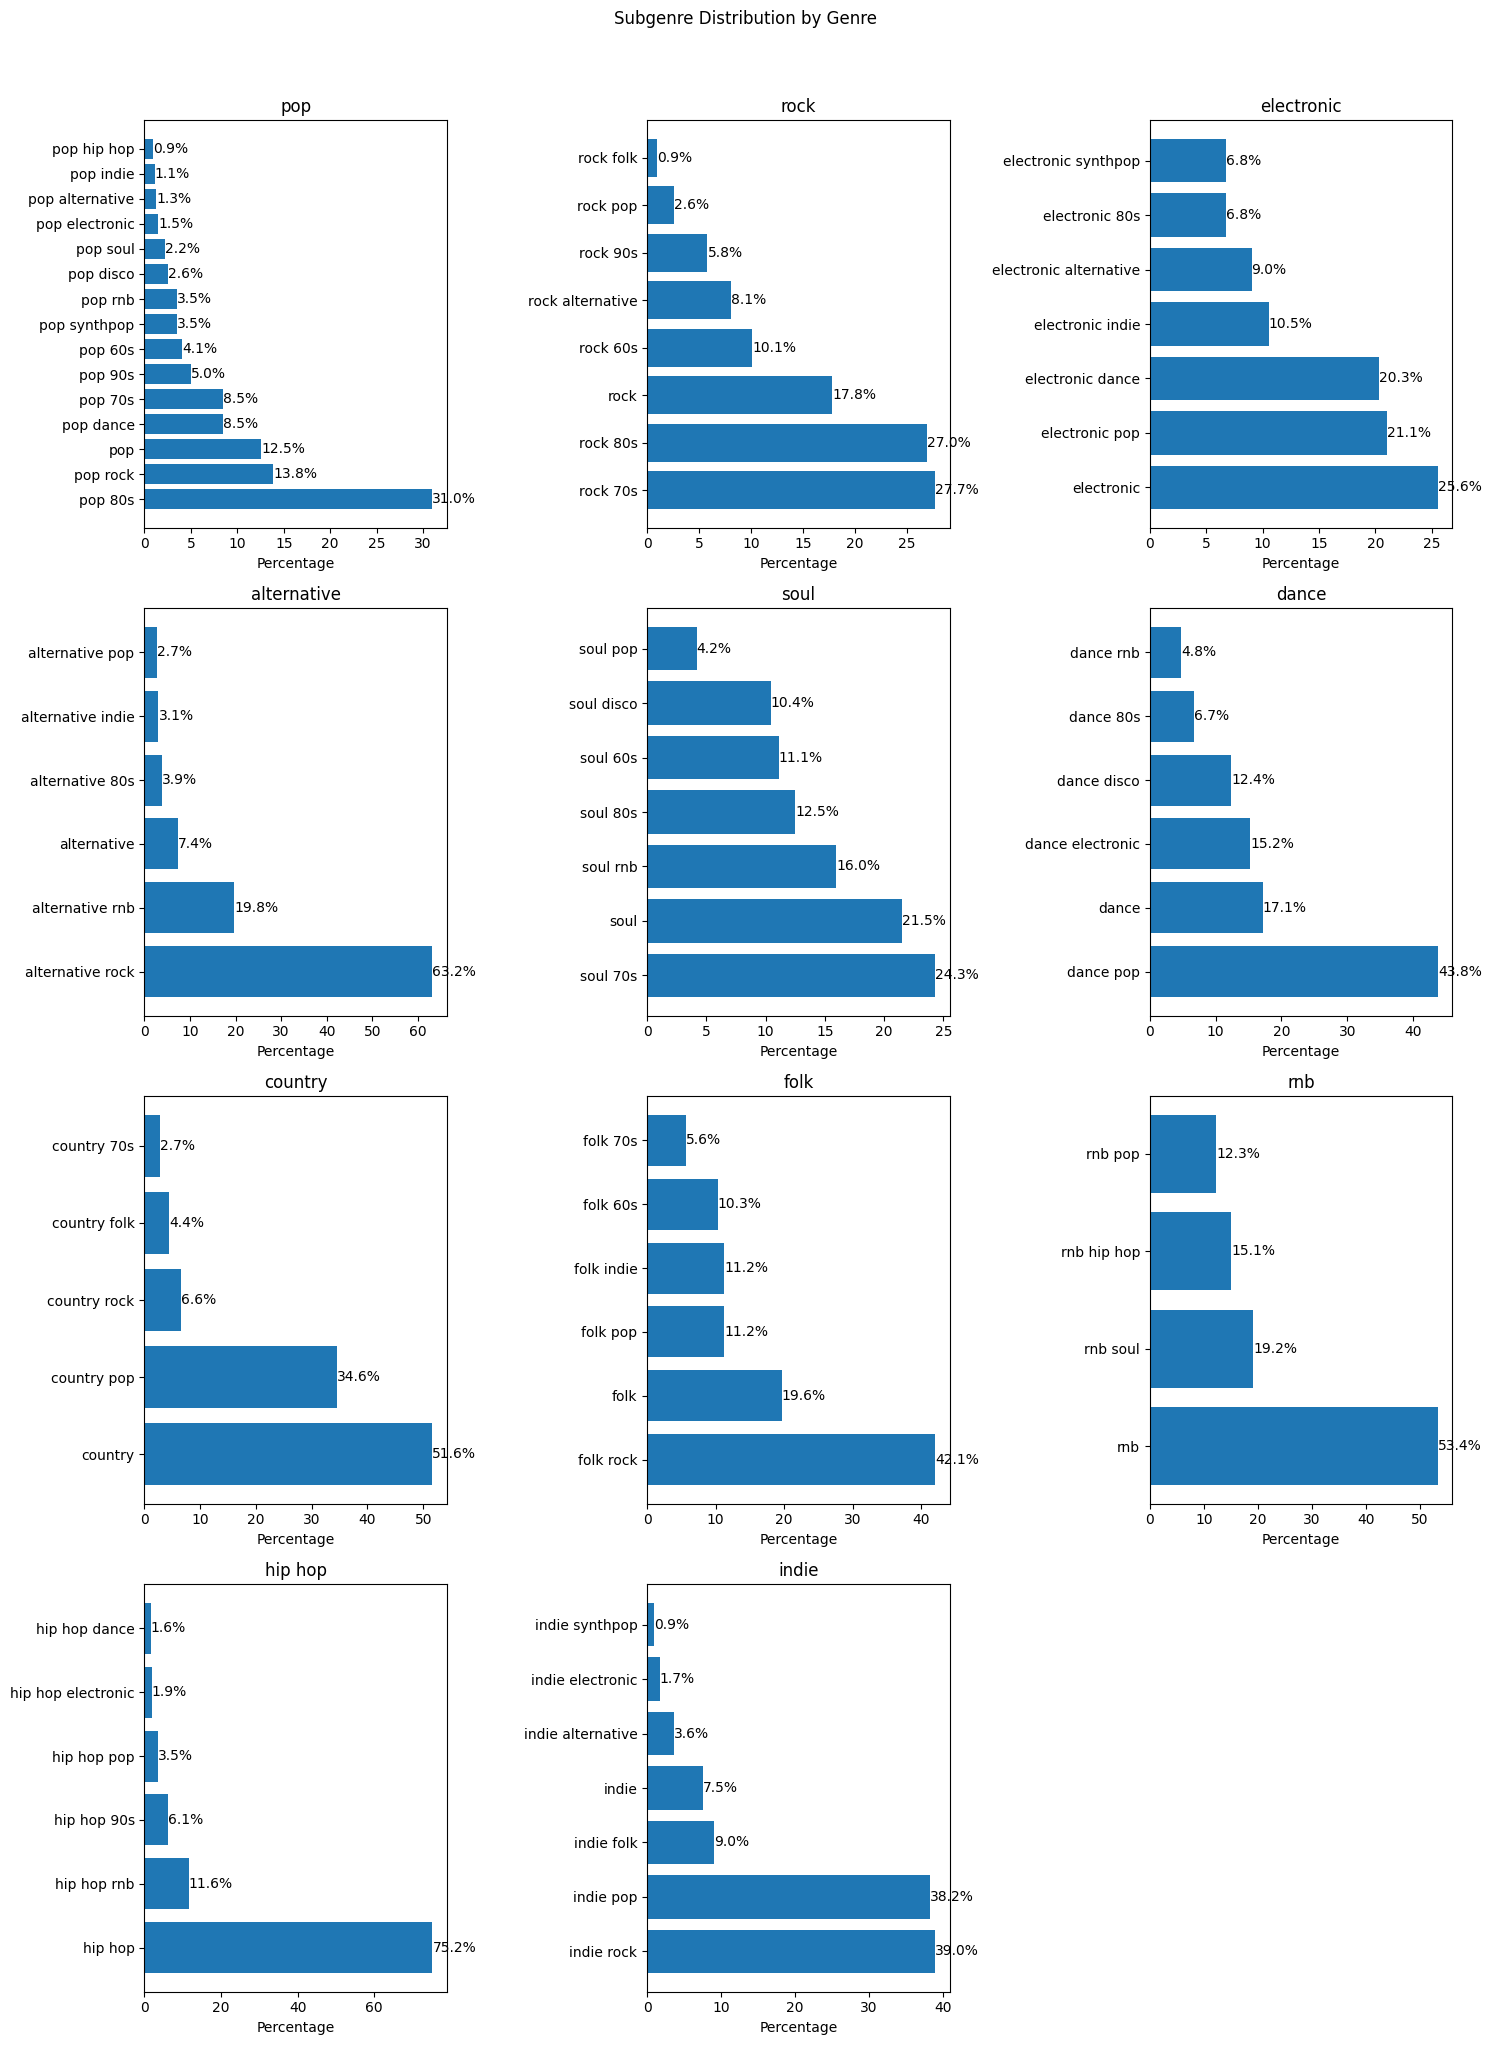

In [40]:
#Create a subplot for each genre showing the distribution of subgenres within that genre

# Calculate number of rows and columns for subplot grid
n_genres = len(df_clean['Genre'].unique())   #Count of unique genres
n_cols = 3  # setting the column number to 3 in the grid
n_rows = (n_genres + n_cols - 1) // n_cols  # calculate the rows needed

# Create subplot grid
fig = plt.figure(figsize=(15, 5*n_rows)) #setting subplot size - can play with this
fig.suptitle('Subgenre Distribution by Genre',  y=1.02) #Main figure title and moving it slightly up to not overlap other labels

# Create a subplot for each genre with a for loop
for i, genre in enumerate(df_clean['Genre'].unique()):
    ax = plt.subplot(n_rows, n_cols, i+1)                     # creating a subplot in position i+1 on the plot (defined above).
    
    genre_data = df_clean[df_clean['Genre'] == genre]         # Get data for current genre in the for loop.
    subgenre_counts = genre_data['Subgenre'].value_counts()   # Use the count method for the current genre's subgenres.
    total = len(genre_data)                                   # Total number of songs that belong to the current genre.
    
    # Create percentage data
    percentages = (subgenre_counts/total) * 100
    
    # Initiate horizontal bar chart
    bars = ax.barh(subgenre_counts.index, percentages)     # assigning 'percentages' to the x-axis and 'subgenres' to the y-axis (horizontal bar)
    
    # Add percentage labels in the center of the far right of each bar.
    for bar in bars:
        width = bar.get_width()       # bar length (horizontal)
        ax.text(width,                # position where the bar ends
                bar.get_y() + bar.get_height()/2,   # y -coordinates (middle of bar) 
                f'{width:.1f}%',                    # the label - making it a percentage with 1 decimal
                va='center')                        # centering the text vertically for neater presentation                       
    
    ax.set_title(f'{genre}')
    ax.set_xlabel('Percentage')

plt.tight_layout()
plt.show()


For the most part, each genre has one or two main subgenres that account for a lot of the distribution. This is useful information as more analysis and decisions will have to me made to not over bias the model if certain subgenres can be considered a proxy for a genre.

In [22]:
# Printing summary statistics for each audio feature in the dataset.
df_clean.describe()

,Popularity,BPM,Dance,Energy,Acoustic,Happy,Live,Loud,Time
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,66.835218,121.072628,58.758136,64.303529,23.637205,52.902021,13.614251,-7.727304,234.816033
std,13.897719,27.444159,14.979713,20.097220,26.541940,24.532573,14.308000,3.454340,64.207000
min,20.000000,49.000000,13.000000,4.000000,0.000000,3.000000,0.000000,-26.000000,75.000000
25%,58.000000,101.000000,49.000000,50.000000,2.000000,33.000000,0.000000,-10.000000,195.000000
50%,69.000000,120.000000,59.000000,67.000000,13.000000,53.000000,10.000000,-7.000000,226.000000
75%,77.000000,137.000000,69.000000,80.000000,38.000000,73.000000,20.000000,-5.000000,264.000000
max,100.000000,219.000000,96.000000,100.000000,99.000000,99.000000,90.000000,-1.000000,685.000000


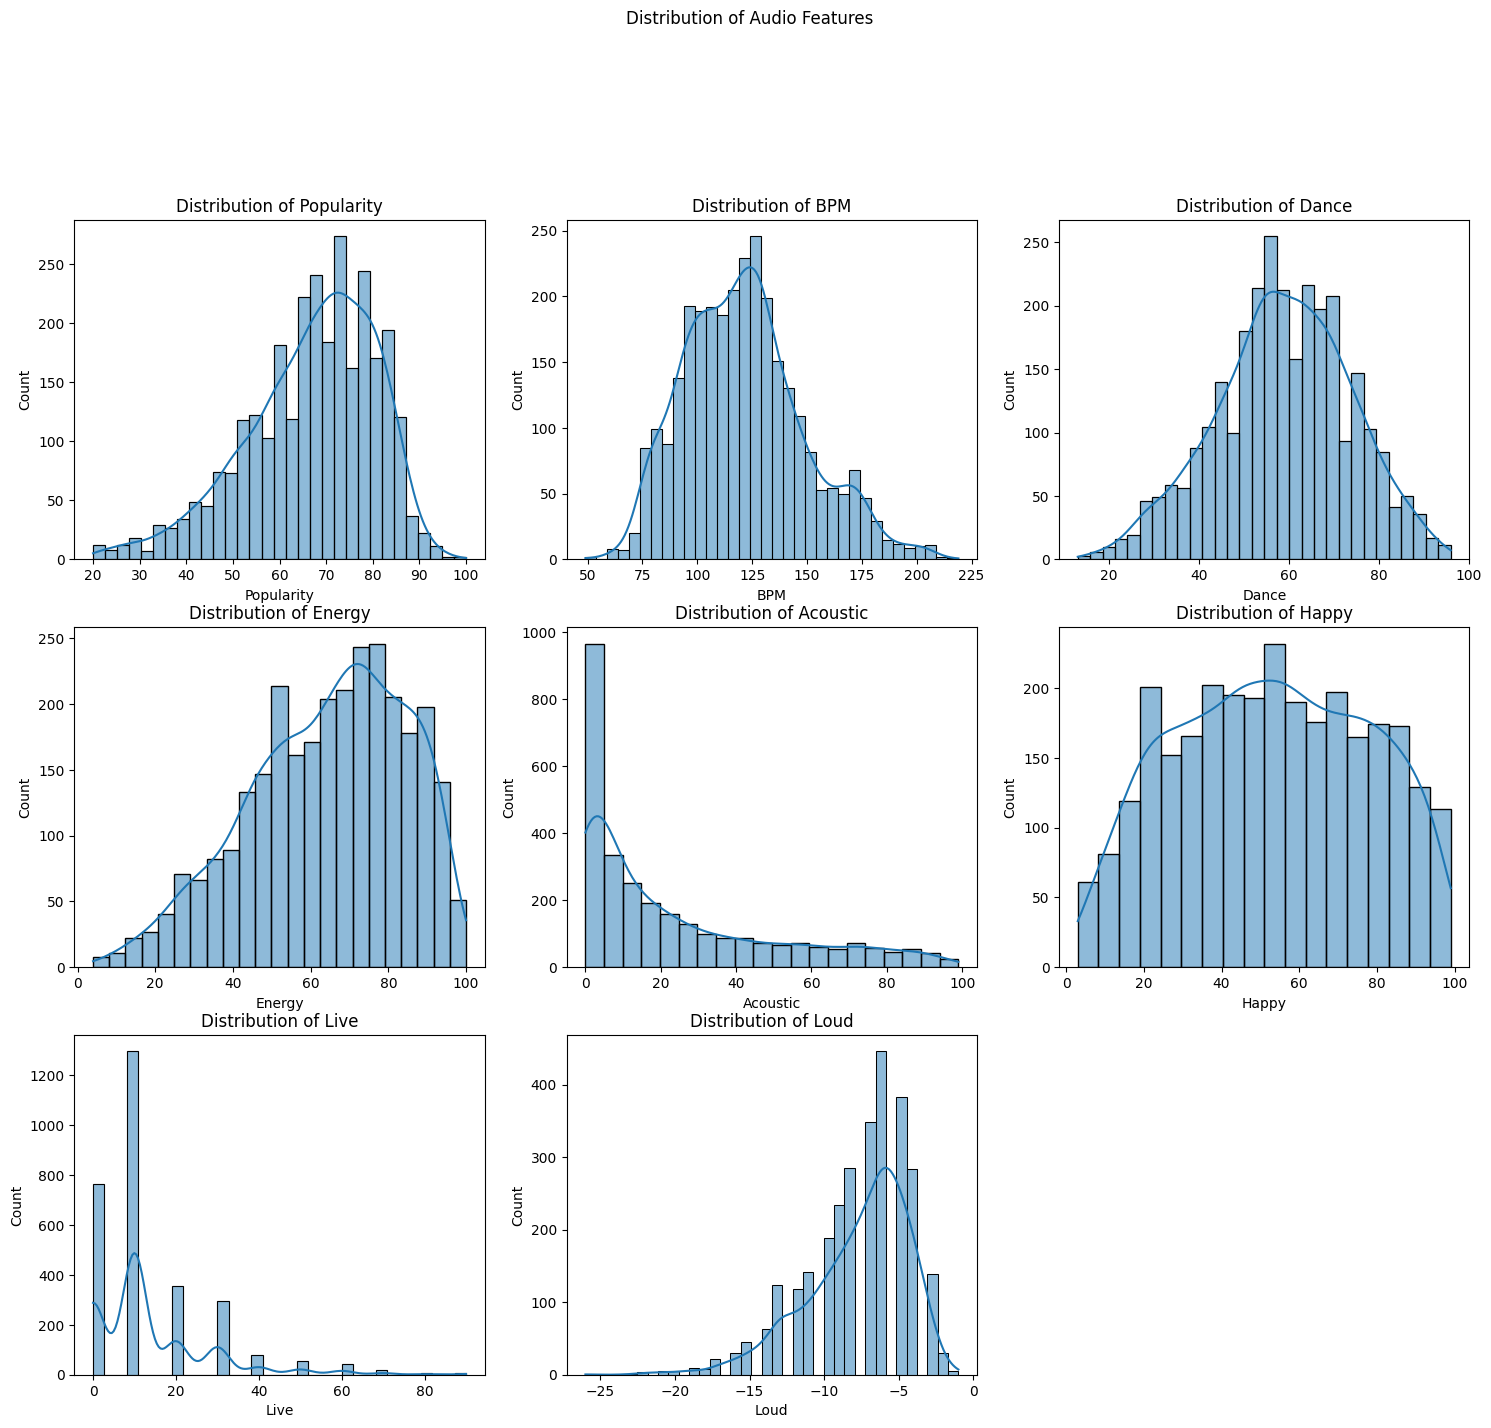

In [42]:
# Create histogram distribition plots for each of the audio features described above. 

# Select numeric audio features
numeric_columns = ['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Happy', 'Live', 'Loud']

# Calculate number of rows needed for 3 columns
n_rows = (len(numeric_columns) + 2) // 3  

# Create subplot grid with 3 columns
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(18, 5*n_rows))   # can play with the dimensions
fig.suptitle('Distribution of Audio Features',  y=1.02)                   # main title and moving it slightly up to not overlap other labels

# Flatten axes array to 1D (vs 2D) for easier indexing 
axes = axes.flatten() 

# Create distribution plots for each audio feature using a for loop
for i, column in enumerate(numeric_columns):
    # Histogram with KDE
    sns.histplot(data=df_clean,                 # define where the data is coming from
                 x=column,                      # define x
                 kde=True,                      # kde creates a smooth curve over the histogram
                 ax=axes[i])                    # sets the subplot to populate in the for loop

    # labels
    axes[i].set_title(f'Distribution of {column}')     
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

C:\Users\Ryan\AppData\Local\Temp\ipykernel_34436\1823681869.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Ryan\AppData\Local\Temp\ipykernel_34436\1823681869.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Ryan\AppData\Local\Temp\ipykernel_34436\1823681869.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Ryan\AppData\Local\Temp\ipykernel_34436\1823681869.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

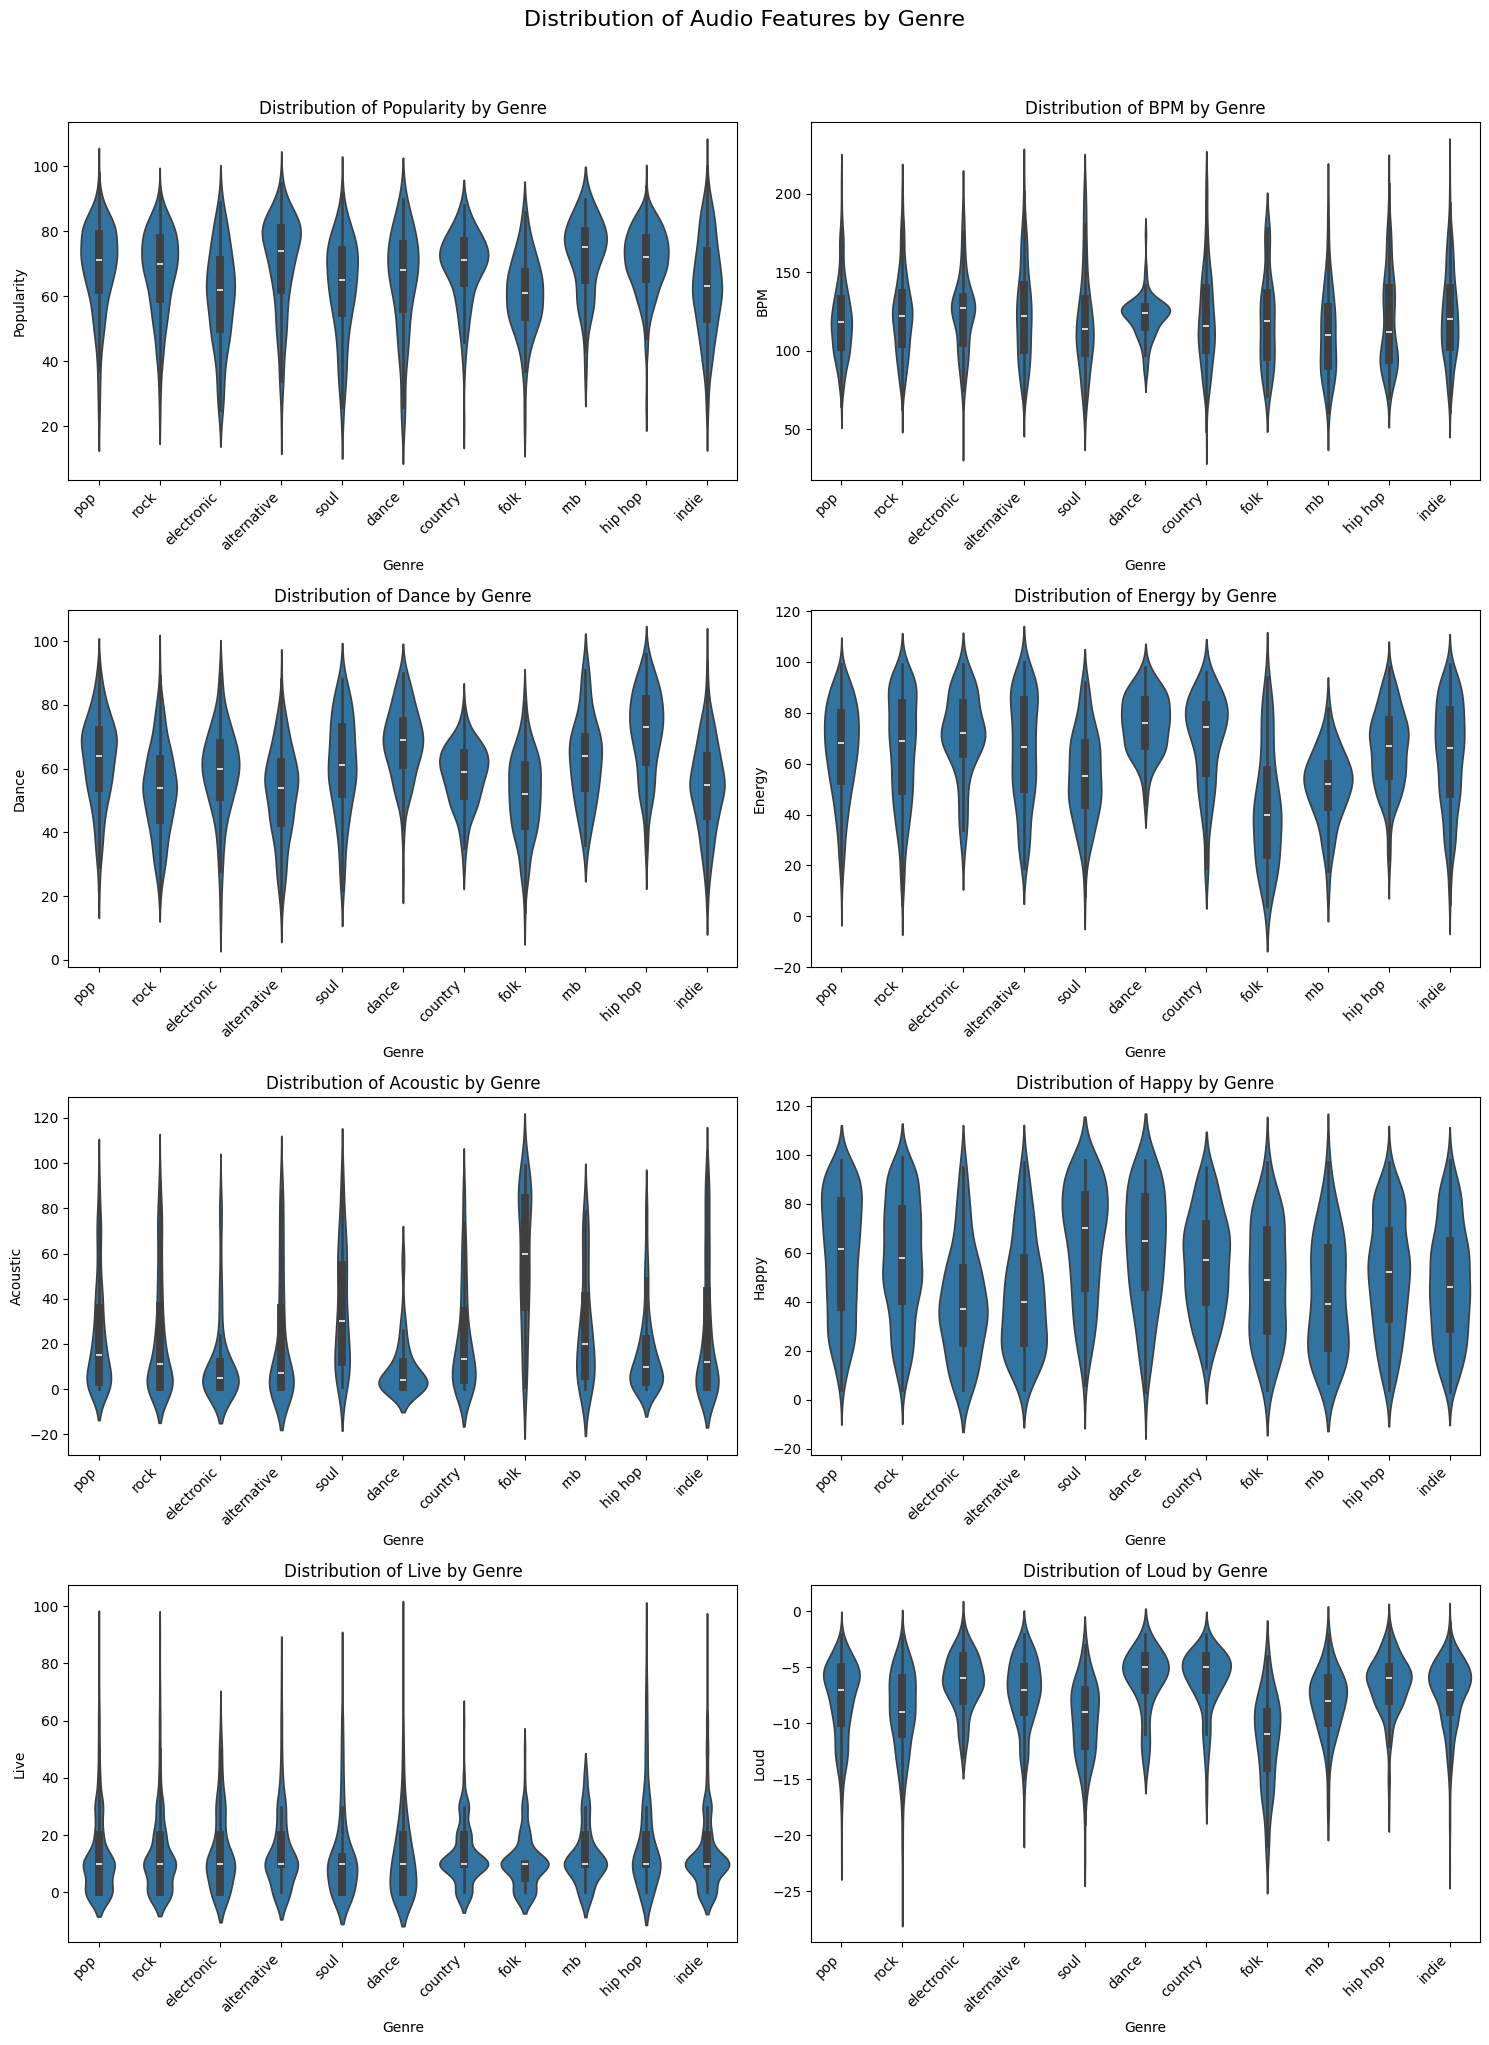

In [34]:
# Create violin plots. This will show the feature distibutions across all the genres. This will allow us to see if specific genres are more
# or less extreme for a specific feature in relation to the dataset. This can help identify areas the model may weight heavily in differentiating genres.


# Select the numeric audio features.
numeric_columns = ['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Happy', 'Live', 'Loud']

# Create subplot grid (same process as the previous plots)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('Distribution of Audio Features by Genre', y=1.02)

# Flatten axes array to 1D (vs 2D) for easier indexing
axes = axes.flatten()

# Create distribution plots for each feature using a for loop
for i, column in enumerate(numeric_columns):
    # Create violin plot with boxplot inside 
    sns.violinplot(data=df_clean,                     # Define the data source     
                   x='Genre',                         # Set the x-axis (genre)
                   y=column,                          # Set the y-axis (numeric audio feature measurements)
                   ax=axes[i])
    
    # Rotate x-axis labels for better readability. Making the labels tilted 45 degrees.
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    
    # Titles and labels
    axes[i].set_title(f'Distribution of {column} by Genre')
    axes[i].set_xlabel('Genre')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()


In [28]:
# Create a dataframe/table showing the mean value per genre for each audio feature.
# Use the groupby function to group features by genre and then calculate the mean for each.
summary_df = pd.DataFrame({
    'Popularity': df_clean.groupby('Genre')['Popularity'].mean(),
    'BPM': df_clean.groupby('Genre')['BPM'].mean(),
    'Dance': df_clean.groupby('Genre')['Dance'].mean(),
    'Energy': df_clean.groupby('Genre')['Energy'].mean(),
    'Acoustic': df_clean.groupby('Genre')['Acoustic'].mean(),
    'Happy': df_clean.groupby('Genre')['Happy'].mean(),
    'Live': df_clean.groupby('Genre')['Live'].mean(),
    'Loud': df_clean.groupby('Genre')['Loud'].mean()
}).round(2)

# Display the table
print("\nMean Values by Genre:")
print(summary_df)


Mean Values by Genre:
             Popularity     BPM  Dance  Energy  Acoustic  Happy   Live   Loud
Genre                                                                        
alternative       70.27  123.75  52.44   65.10     21.69  42.58  14.53  -7.22
country           69.16  120.51  57.96   69.15     22.18  55.77  12.80  -6.16
dance             64.71  121.19  68.09   75.84      9.29  61.47  12.29  -6.16
electronic        60.13  123.42  58.94   71.21     12.50  40.22  14.44  -6.37
folk              60.60  118.36  51.56   43.09     58.17  48.65  10.65 -11.48
hip hop           70.93  118.26  71.20   65.52     16.52  51.21  17.65  -6.53
indie             63.11  122.76  54.56   63.59     25.69  47.86  13.54  -7.20
pop               68.86  120.11  62.73   65.42     23.20  58.69  12.75  -7.89
rnb               72.49  111.05  62.81   51.19     27.33  42.79  12.74  -8.10
rock              67.32  122.96  53.37   65.57     22.56  57.65  13.11  -8.87
soul              62.76  118.25  61.14   

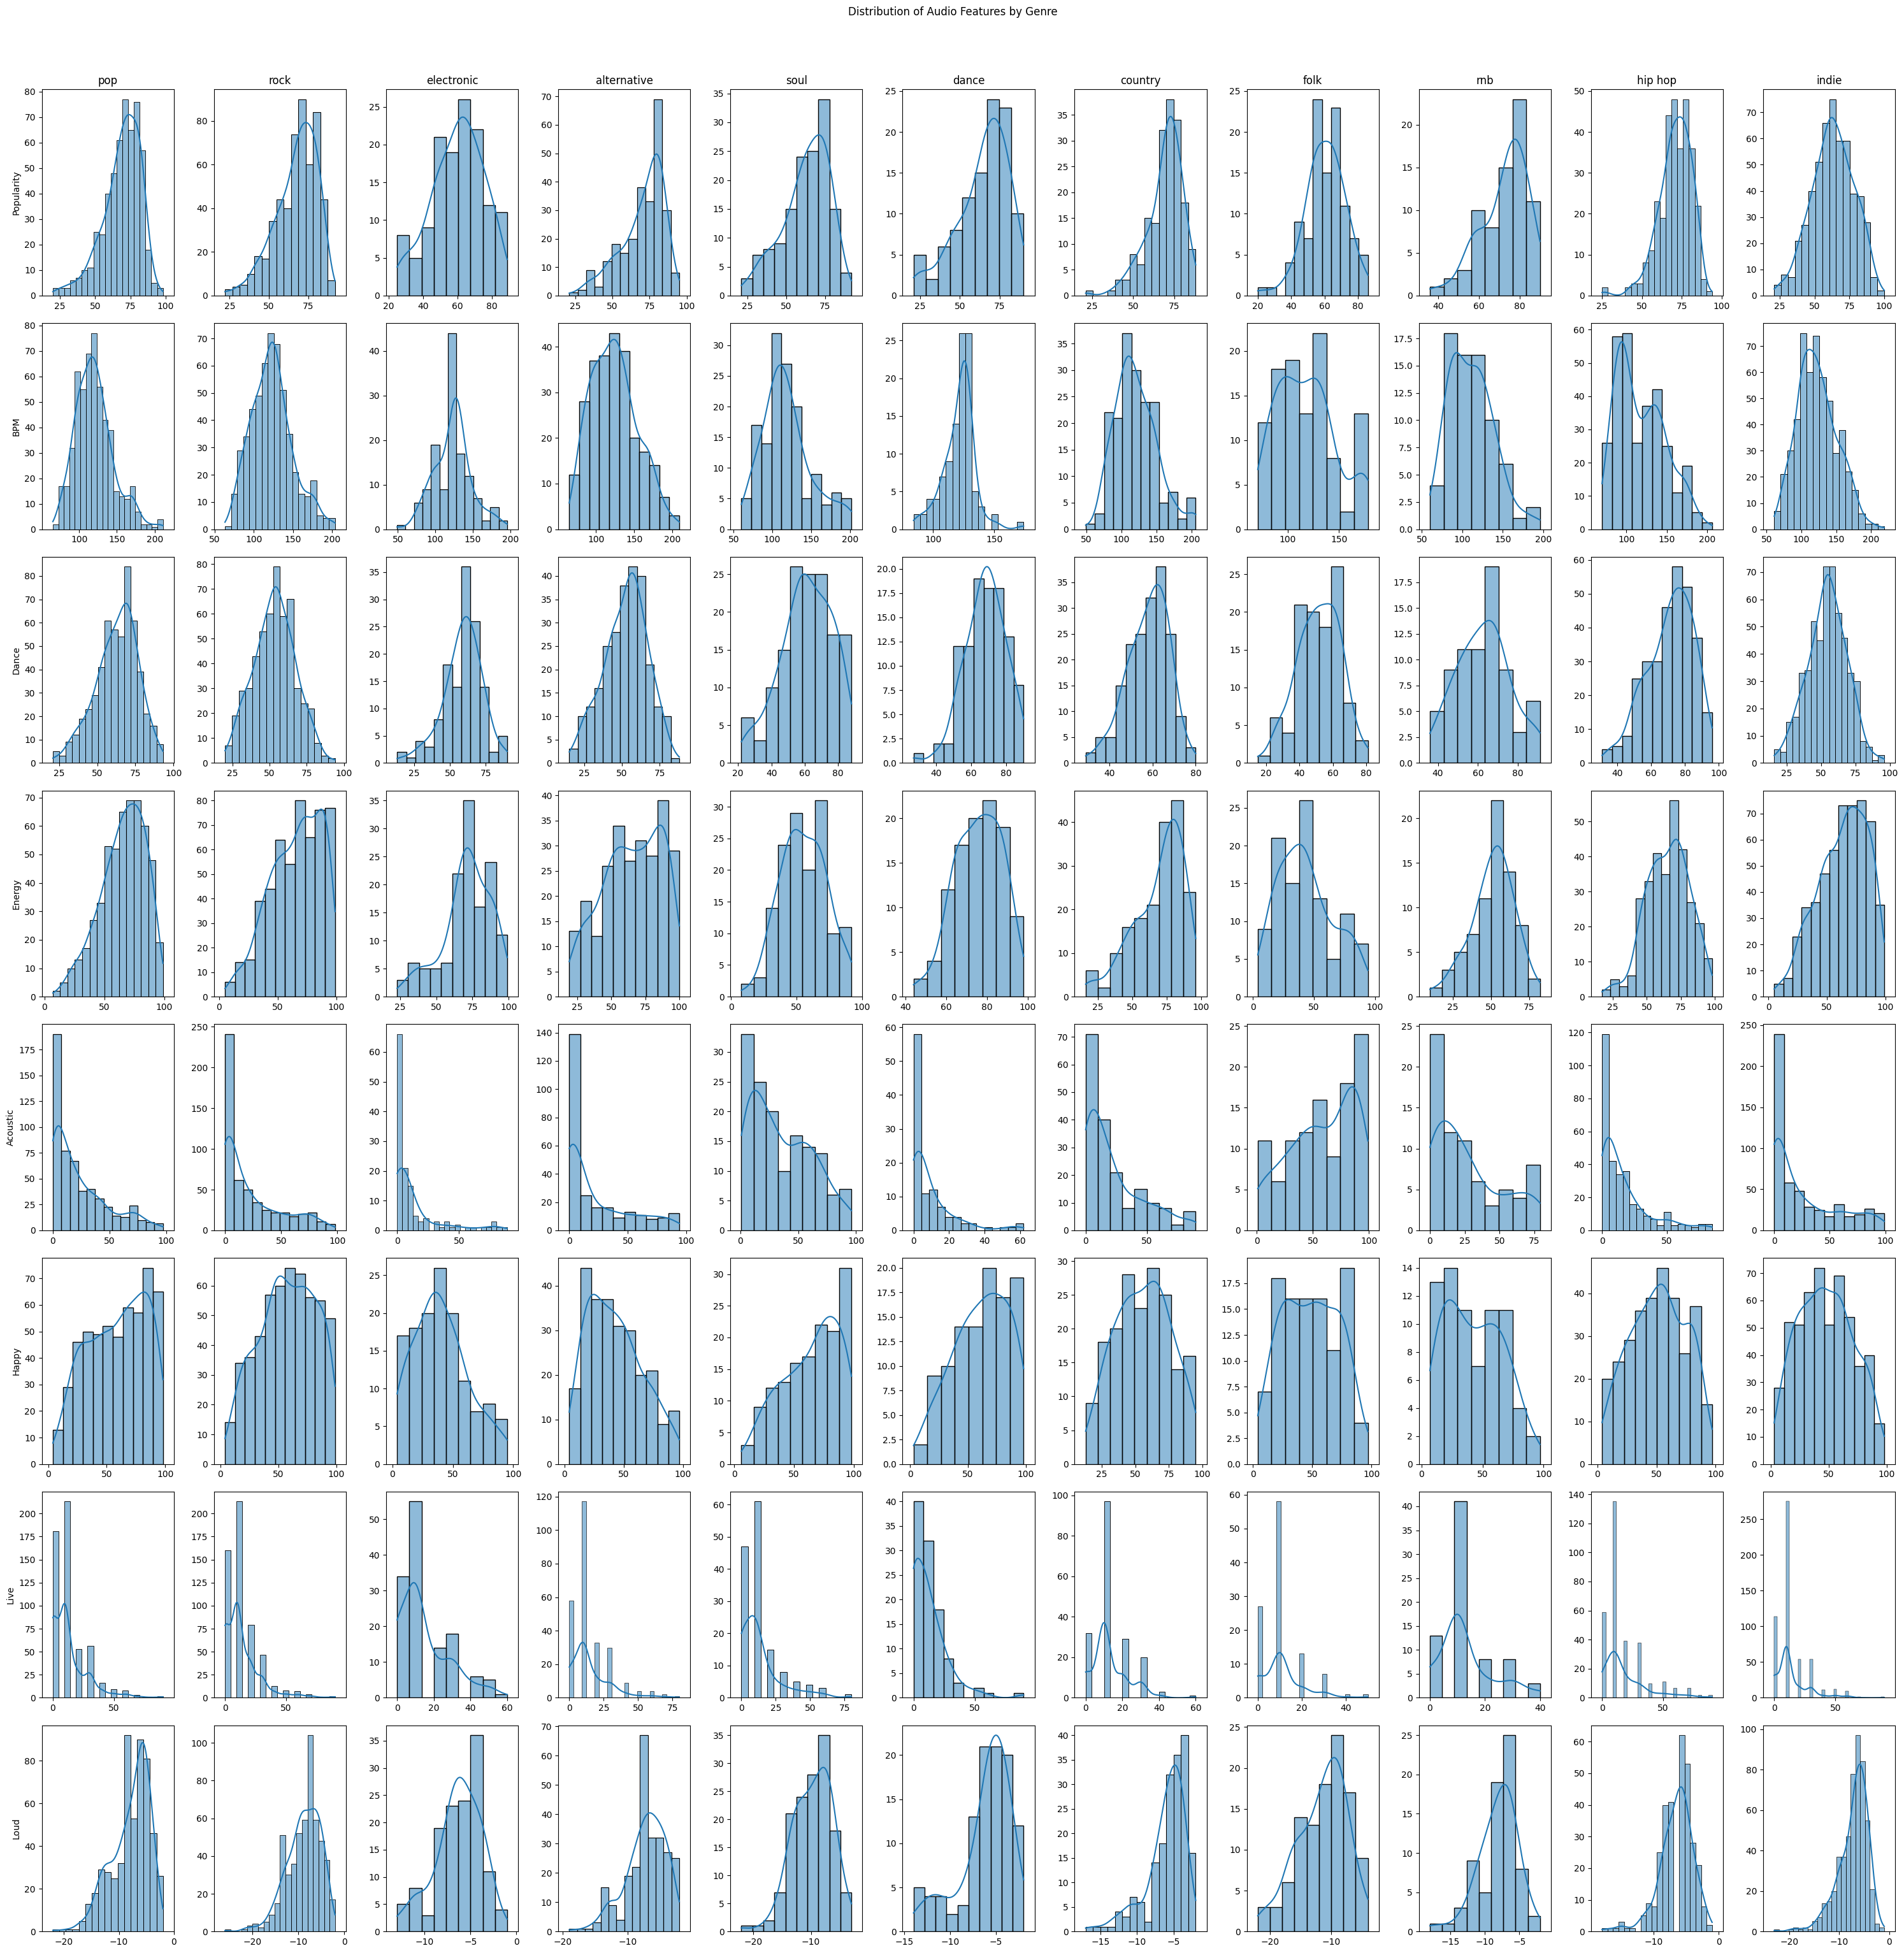

In [45]:
# Create a grid of histograms using the seaborn library. There will be a histogram generated for each feature-genre combination.


# Select numeric audio features.
numeric_columns = ['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Happy', 'Live', 'Loud']
genres = df_clean['Genre'].unique()

# Create a large subplot grid (one row per feature, one column per genre)
fig, axes = plt.subplots(nrows=len(numeric_columns), 
                        ncols=len(genres), 
                        figsize=(30, 30))  # Adjust figure size if you need. I found these measurements work well.

fig.suptitle('Distribution of Audio Features by Genre', y=1.02) # Main title, moving it up slightly to not overlap labels

# Create histogram for each feature and genre combination using a for loop
for i, feature in enumerate(numeric_columns):
    for j, genre in enumerate(genres):
        
        # Create histogram for specific genre and feature
        genre_data = df_clean[df_clean['Genre'] == genre]    # Filering the data to only select data for the specific genre
        sns.histplot(data=genre_data,                        # Defining the data calculated in the previous step (filtered data)
                    x=feature,                               # Define x-axis
                    ax=axes[i,j],                            # specify subplot grid position in relation to for loop progress.
                    kde=True)                                # kde adds a smooth density curve over all the histograms.
        
        # Titles and labels
        if i == 0:  # Only set genre titles on top row (because each column represents one genre... we do not need redundant labels). 
            axes[i,j].set_title(genre)               
        if j == 0:  # Only set feature labels on first column (because each row represents one feature... we do not need redundant labels).
            axes[i,j].set_ylabel(feature)
        else:  # Remove redundant labels.         
            axes[i,j].set_ylabel('')

         # Add padding to x-axis to prevent axis getting cut off
        axes[i,j].margins(x=0.1)  # Add 10% padding to the x-axis
            
        # Remove x-labels except for bottom row
        axes[i,j].set_xlabel('')  # Remove x-labels from every plot

plt.tight_layout()
plt.show()